In [24]:
#Importo librerías
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Lectura del dataset
diabetes_dataset = pd.read_csv("diabetes.csv")


In [26]:
#Muestro los 5 primeros elementos de dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
#cantidad de filas y columnas
diabetes_dataset.shape

(768, 9)

In [28]:
#información estadística casos negativos
diabetes_dataset[diabetes_dataset['Outcome']==0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [29]:
#información estadística casos positivos
diabetes_dataset[diabetes_dataset['Outcome']==1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [30]:
#cantidad de diabéticos (1) y no diabéticos (0) en el dataset
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

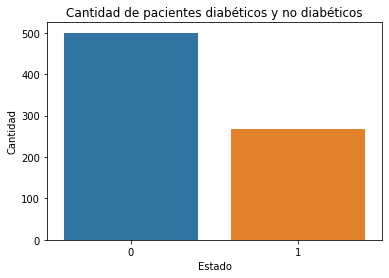

In [31]:
#Crear diagrama de barras
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Cantidad de pacientes diabéticos y no diabéticos')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

In [32]:
#el % de glucosa en sangre en diabéticos es mayor que los que no lo son.
#A su vez, la personas de mayor edad son más suceptibles a tener diabetes.
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


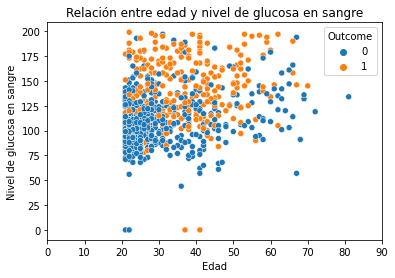

In [33]:
# gráfico de dispersión que indica la relación entre la edad y el nivel de glucosa en sangre de los pacientes diabéticos y no diabéticos
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=diabetes_dataset)
plt.title('Relación entre edad y nivel de glucosa en sangre')
plt.xlabel('Edad')
plt.ylabel('Nivel de glucosa en sangre')
plt.xticks(range(0, 100, 10))
plt.show()

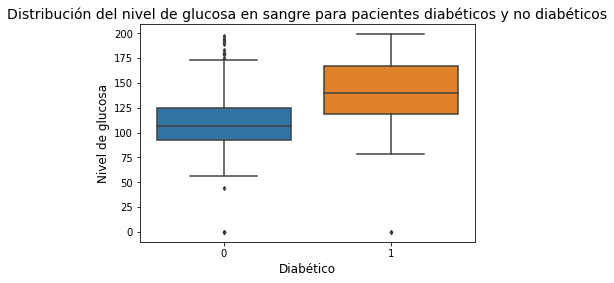

<Figure size 576x432 with 0 Axes>

In [34]:
# diagrama de cajas y bigotes que compara la distribución del nivel de glucosa en sangre entre pacientes diabéticos
#y no diabéticos en el conjunto de datos. 
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_dataset, fliersize=3)
plt.title('Distribución del nivel de glucosa en sangre para pacientes diabéticos y no diabéticos', fontsize=14)
plt.xlabel('Diabético', fontsize=12)
plt.ylabel('Nivel de glucosa', fontsize=12)
plt.figure(figsize=(8,6))
plt.show()

In [35]:
# Me quedo con las columnas relevantes y las traduzco al español
diabetes_df_limpio = diabetes_dataset.loc[:, ['Age', 'Glucose', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Outcome']]
diabetes_df_limpio = diabetes_df_limpio.rename(columns={
    'Age': 'Edad',
    'Glucose': 'Glucosa',
    'Insulin': 'Insulina',
    'BMI': 'IMC',
    'DiabetesPedigreeFunction': 'Historial Familiar de Diabetes',
    'Outcome': 'Resultado'
})

diabetes_df_limpio

,Edad,Glucosa,Insulina,IMC,Historial Familiar de Diabetes,Resultado
0,50,148,0,33.6,0.627,1
1,31,85,0,26.6,0.351,0
2,32,183,0,23.3,0.672,1
3,21,89,94,28.1,0.167,0
4,33,137,168,43.1,2.288,1
...,...,...,...,...,...,...
763,63,101,180,32.9,0.171,0
764,27,122,0,36.8,0.340,0
765,30,121,112,26.2,0.245,0
766,47,126,0,30.1,0.349,1


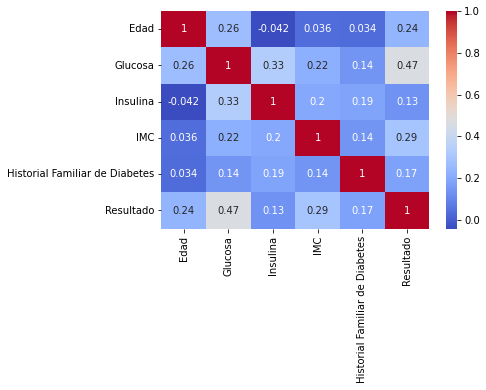

In [36]:
#matriz de correlación entre las variables
corr = diabetes_df_limpio.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

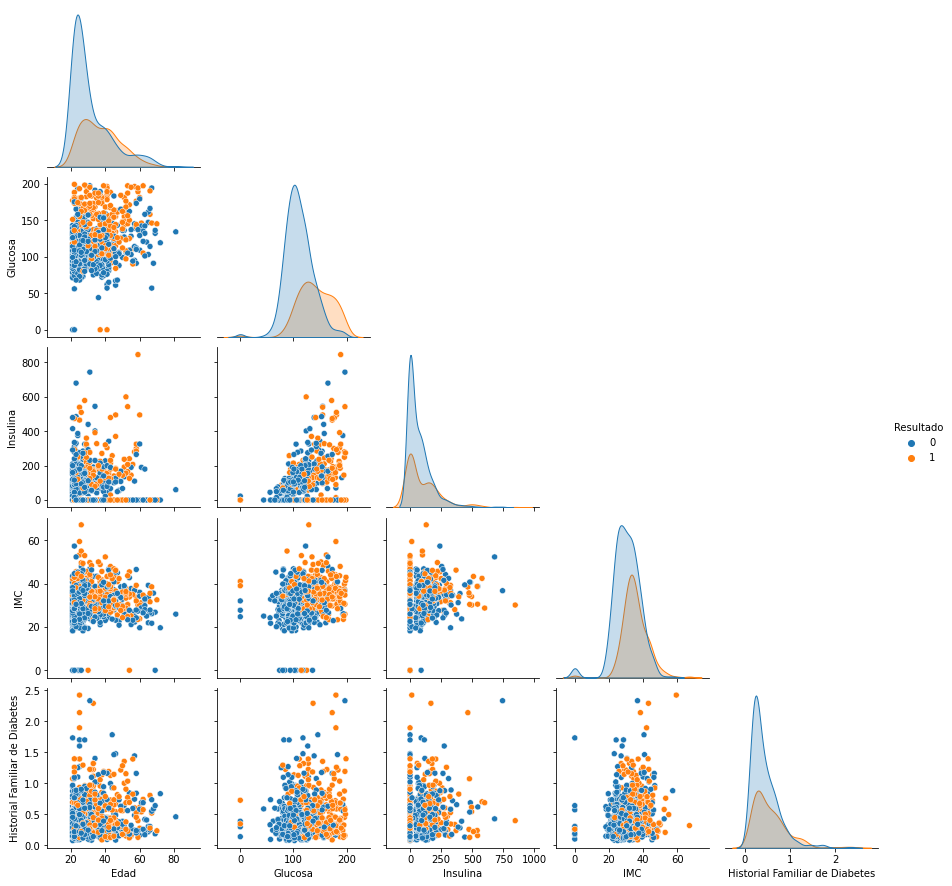

In [37]:
sns.pairplot(data=diabetes_df_limpio, hue='Resultado', corner=True)

In [38]:
#separo los datos y los labels
x = diabetes_df_limpio.drop(columns='Resultado', axis=1)

In [39]:
#estandarización de los datos
scaler = StandardScaler()
scaler.fit(x)
data_estadarizada = scaler.transform(x)
data_estadarizada

array([[ 1.4259954 ,  0.84832379, -0.69289057,  0.20401277,  0.46849198],
       [-0.19067191, -1.12339636, -0.69289057, -0.68442195, -0.36506078],
       [-0.10558415,  1.94372388, -0.69289057, -1.10325546,  0.60439732],
       ...,
       [-0.27575966,  0.00330087,  0.27959377, -0.73518964, -0.68519336],
       [ 1.17073215,  0.1597866 , -0.69289057, -0.24020459, -0.37110101],
       [-0.87137393, -0.8730192 , -0.69289057, -0.20212881, -0.47378505]])

In [40]:
#entrenamiento del modelo
x = data_estadarizada
y = diabetes_df_limpio['Resultado']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

print(x.shape, x_train.shape, x_test.shape)

(768, 5) (614, 5) (154, 5)


In [41]:
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [42]:
#resultado del accurancy sobre los datos del entrenamiento
x_train_prediction = classifier.predict(x_train)
training_data_accurancy = accuracy_score(x_train_prediction, y_train)
training_data_accurancy

0.7866449511400652

In [43]:
#resultado del accurancy sobre los datos de prueba
x_test_prediction = classifier.predict(x_test)
testing_data_accurancy = accuracy_score(x_test_prediction, y_test)
testing_data_accurancy

0.7727272727272727

In [45]:
#Modelo predictivo
input_data = (21,	89,	94,	28.1,	0.167)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
std_data

prediction = classifier.predict(std_data)
prediction

if (prediction[0] == 0):
  print('La persona no es diabética')
else:
  print('La persona es diabética')

La persona no es diabética


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
